In [2]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.fire_data import *
from src.data.read_data import *
from src.gen_functions import *
from src.features.dataset import Dataset
from src.features.build_features import *
from src.models.train_model import *
from src.visualization.vis_data import *
from src.features.landuse import *

import seaborn as sns
output_notebook()
plt.rcParams.update({'font.size': 14})

Loading BokehJS ...

# Train Model

## PM2.5

=================find the best RF model=================
best rf score  -0.02925113644699213
val score after op_rf {'val_r2_score': 0.3224, 'val_mean_squared_error': 426.5508, 'val_mean_absolute_error': 16.1946, 'val_r2': 0.5942}


  0%|                                                                                                                                | 0/29 [00:00<?, ?it/s]

================ remove unncessary columns no lag=================


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [03:35<00:00,  7.44s/it]


score after dropping columns  {'r2_score': 0.3302, 'mean_squared_error': 421.6531, 'mean_absolute_error': 16.135, 'r2': 0.6069}
================= find the best fire feature ===================
optimizing fire parameter using skopt optimizer. This will take about 4 hours
old fire parameter {'w_speed': 20.0, 'shift': 72, 'roll': 92, 'damp_surface': 4.33, 'wind_damp': False, 'wind_lag': True, 'split_direct': 0} is still better than optimized score =418.2589354361939
======== trim fire zone_list ========
final zone list [0, 100, 200, 400, 600, 650] give score {'val_r2_score': 0.3247, 'val_mean_squared_error': 423.2644, 'val_mean_absolute_error': 15.8851, 'val_r2': 0.5888}
old score 423.2644, new score 466.9051
keep old cat hour option, which is 1
val score after cat_hour(){'val_r2_score': 0.3098, 'val_mean_squared_error': 433.5972, 'val_mean_absolute_error': 16.0552, 'val_r2': 0.5733}
old score 433.5972, new score 449.8742
keep old cat month option, which is 1
val score after cat_month(){'

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 68/68 [09:03<00:00,  7.99s/it]


score after dropping columns  {'r2_score': 0.346, 'mean_squared_error': 412.0012, 'mean_absolute_error': 15.5884, 'r2': 0.5966}
best rf score  -0.12035956806708967
val score after op6 {'val_r2_score': 0.3234, 'val_mean_squared_error': 426.2319, 'val_mean_absolute_error': 16.1384, 'val_r2': 0.5978}
test score after op6  {'testop6_r2_score': 0.0317, 'testop6_mean_squared_error': 337.1186, 'testop6_mean_absolute_error': 13.8754, 'testop6_r2': 0.2996}
final score for test set {'test_r2_score': 0.0719, 'test_mean_squared_error': 436.2554, 'test_mean_absolute_error': 16.0754, 'test_r2': 0.3079}
daily avg score for test set {'avg_trn_r2_score': -0.2563, 'avg_trn_mean_squared_error': 184.2902, 'avg_trn_mean_absolute_error': 11.0468, 'avg_trn_r2': 0.2234}
Wall time: 2h 57min 48s


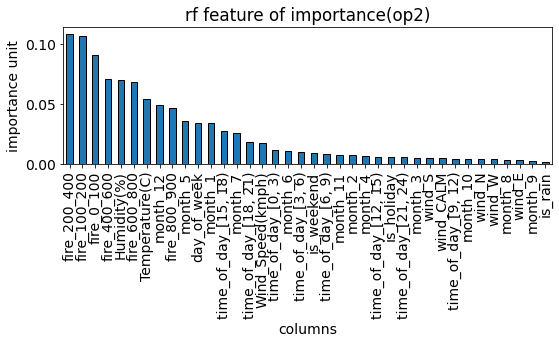

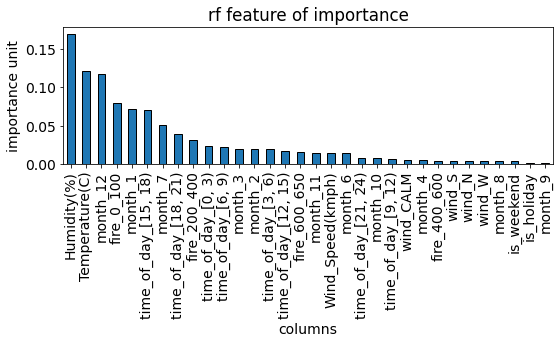

In [6]:
%%time
# training without catergorize hour of day
dataset, model, trainer = train_city_s1(city='Jakarta', pollutant= 'PM2.5', op_fire_twice=False, search_wind_damp=True, choose_cat_hour=True, choose_cat_month=True)

In [4]:
# cat hour, cat month
dataset, model, fire_cols, zone_list, feat_imp, rolling_win = load_model(city='Jakarta', pollutant='PM2.5' )

raw model performance {'test_r2_score': 0.0197, 'test_mean_squared_error': 459.9078, 'test_mean_absolute_error': 16.8467, 'test_r2': nan}
daily avg training error {'avg_trn_r2_score': 0.9801, 'avg_trn_mean_squared_error': 4.8593, 'avg_trn_mean_absolute_error': 1.6668, 'avg_trn_r2': 0.9914}
daily avg test error {'avg_test_r2_score': -0.1809, 'avg_test_mean_squared_error': 167.8039, 'avg_test_mean_absolute_error': 10.7214, 'avg_test_r2': 0.2928}


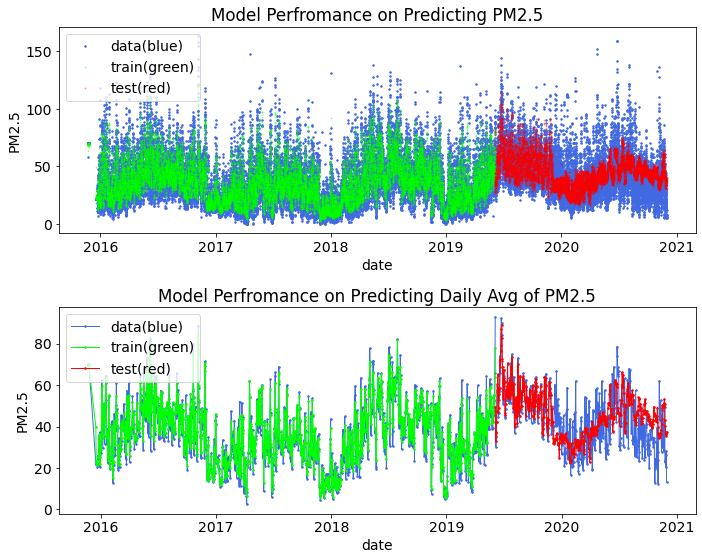

In [5]:
_, df = plot_model_perf(dataset=dataset, model=model, split_list=[0.7, 0.3], xlim=[], to_save=True)

In [12]:
# initialize a trainer object
trainer = Trainer(city='Jakarta', pollutant='PM2.5')
trainer.n_jobs = -2

data no fire has shape (34737, 24)


In [ ]:
%%time
# cat_hour=True
dataset, model, poll_meta, trainner = train_city_s1(city='Jakarta', pollutant= 'PM2.5', search_wind_damp=True, default_meta=True)

In [14]:
#op4
trainer.dataset.x_cols_org = trainer.dataset.x_cols = ['Temperature(C)', 'Humidity(%)', 'Wind Speed(kmph)', 'wind_E', 'wind_N', 'wind_S', 'wind_W', 'is_rain', 'is_holiday', 'is_weekend', 'day_of_week', 'time_of_day_[0, 2)', 'time_of_day_[2, 4)', 'time_of_day_[4, 6)', 'time_of_day_[6, 8)', 'time_of_day_[8, 10)', 'time_of_day_[10, 12)', 'time_of_day_[12, 14)', 'time_of_day_[14, 16)', 'time_of_day_[16, 18)', 'time_of_day_[18, 20)', 'time_of_day_[20, 22)', 'time_of_day_[22, 24)', 'fire_0_100', 'fire_100_200', 'fire_200_400', 'fire_400_800', 'fire_800_1000']

trainer.op4_lag()

new mean squared error 293.93293658841037 using {'n_max': 80, 'step': 1, 'roll': True}
xtrn has shape (15596, 2240)
op4 score {'val_r2_score': 0.17563293835049176, 'val_mean_squared_error': 293.93293658841037, 'val_mean_absolute_error': 13.272096752796328}
op4 test score {'test_r2_score': -0.11905703989581373, 'test_mean_squared_error': 326.0280786591907, 'test_mean_absolute_error': 13.707876398231123}
================= optimization 5: remove unncessary lag columns =================
old cols length 2240


KeyboardInterrupt: 

In [ ]:
#op5 
trainer.op6_rf()
trainer.final_fit()
trainer.save_feat_imp()
trainer.save_all()

In [ ]:
dataset, model, fire_cols, zone_list, feat_imp, rolling_win = load_model(city='Jakarta', pollutant='PM2.5' )
_, df = plot_model_perf(dataset=dataset, model= model, split_list=[0.8, 0.2], xlim=[], to_save=False)

In [ ]:
# Train Model

## PM2.5

# initialize a trainer object
trainer = Trainer(city='Jakarta', pollutant='PM2.5')
trainer.n_jobs = -2

%%time
# cat_hour=True
dataset, model, poll_meta, trainner = train_city_s1(city='Jakarta', pollutant= 'PM2.5', search_wind_damp=True, default_meta=True)

#op4
trainer.dataset.x_cols_org = trainer.dataset.x_cols = ['Temperature(C)', 'Humidity(%)', 'Wind Speed(kmph)', 'wind_E', 'wind_N', 'wind_S', 'wind_W', 'is_rain', 'is_holiday', 'is_weekend', 'day_of_week', 'time_of_day_[0, 2)', 'time_of_day_[2, 4)', 'time_of_day_[4, 6)', 'time_of_day_[6, 8)', 'time_of_day_[8, 10)', 'time_of_day_[10, 12)', 'time_of_day_[12, 14)', 'time_of_day_[14, 16)', 'time_of_day_[16, 18)', 'time_of_day_[18, 20)', 'time_of_day_[20, 22)', 'time_of_day_[22, 24)', 'fire_0_100', 'fire_100_200', 'fire_200_400', 'fire_400_800', 'fire_800_1000']

trainer.op4_lag()

#op5 
trainer.op6_rf()
trainer.final_fit()
trainer.save_feat_imp()
trainer.save_all()

dataset, model, fire_cols, zone_list, feat_imp, rolling_win = load_model(city='Jakarta', pollutant='PM2.5' )
_, df = plot_model_perf(dataset=dataset, model= model, split_list=[0.8, 0.2], xlim=[], to_save=False)